# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | whangarei
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | port saint john's
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | magong
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | inarajan village
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | zheleznodorozhnyy
Processing Record 18 of Set 1 | turpan
Processing Record 19 of Set 1 | chulakkurgan
Processing Record 20 of Set 1 | formosa
Processing Record 21 of Set 1 | passau
Processing R

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,277.06,70,0,4.12,SJ,1686177114
1,edinburgh of the seven seas,-37.0676,-12.3116,288.15,83,12,12.05,SH,1686177114
2,avarua,-21.2078,-159.7750,299.18,69,20,6.69,CK,1686177114
3,wailua homesteads,22.0669,-159.3780,300.85,76,20,4.63,US,1686177114
4,whangarei,-35.7317,174.3239,286.89,79,69,3.91,NZ,1686177114


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,277.06,70,0,4.12,SJ,1686177114
1,edinburgh of the seven seas,-37.0676,-12.3116,288.15,83,12,12.05,SH,1686177114
2,avarua,-21.2078,-159.7750,299.18,69,20,6.69,CK,1686177114
3,wailua homesteads,22.0669,-159.3780,300.85,76,20,4.63,US,1686177114
4,whangarei,-35.7317,174.3239,286.89,79,69,3.91,NZ,1686177114


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

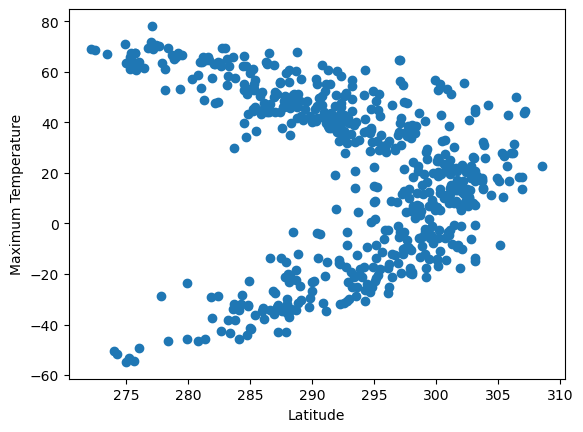

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

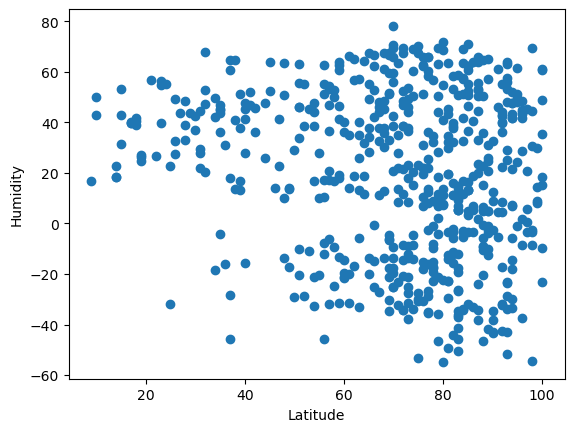

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

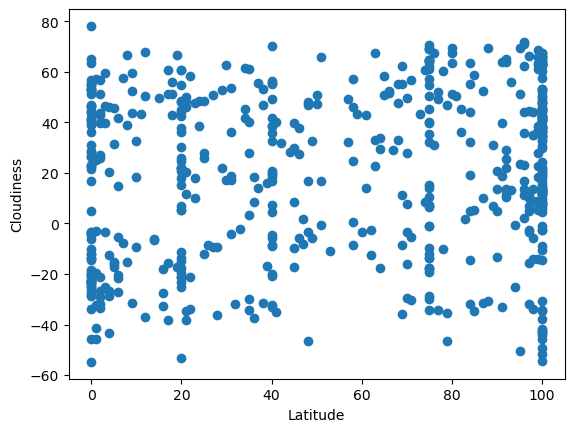

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

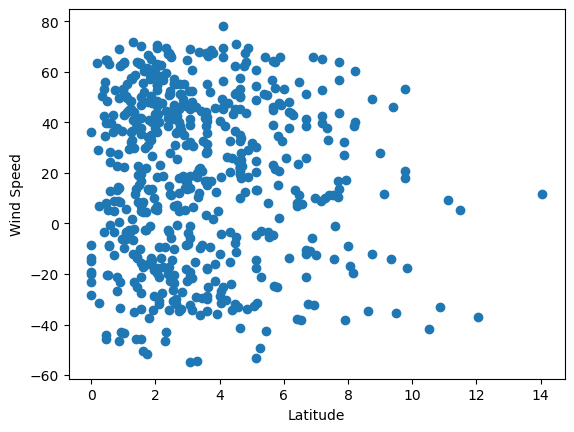

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values):
    r = st.pearsonr(x_values,y_values)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel(f"{x_values.name}")
    plt.ylabel(f"{y_values.name}")

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,277.06,70,0,4.12,SJ,1686177114
3,wailua homesteads,22.0669,-159.3780,300.85,76,20,4.63,US,1686177114
10,magong,23.5654,119.5863,300.67,87,95,6.45,TW,1686177116
11,bethel,41.3712,-73.4140,292.32,59,100,2.57,US,1686176935
12,inarajan village,13.2736,144.7484,301.92,85,100,5.18,GU,1686177116


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,288.15,83,12,12.05,SH,1686177114
2,avarua,-21.2078,-159.7750,299.18,69,20,6.69,CK,1686177114
4,whangarei,-35.7317,174.3239,286.89,79,69,3.91,NZ,1686177114
5,grytviken,-54.2811,-36.5092,275.58,98,100,3.29,GS,1686177115
6,port saint john's,-31.6229,29.5448,292.56,61,9,5.16,ZA,1686177115


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7690160371692601


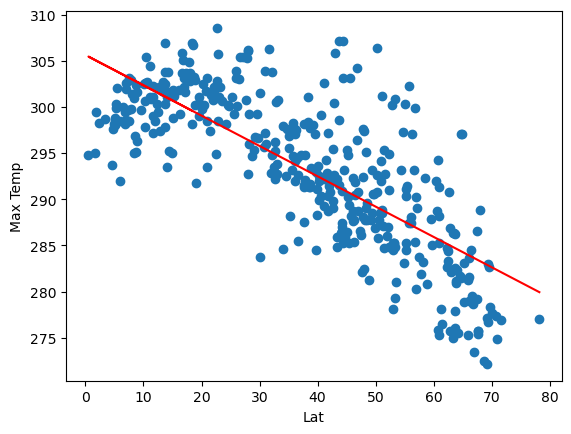

In [47]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.8260172599539539


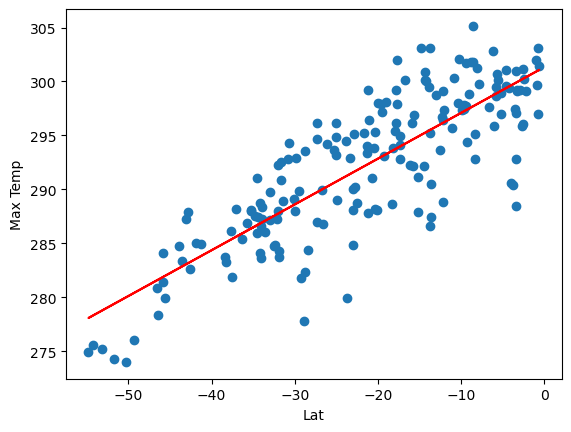

In [48]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** 

. There is strong negative correlation between temperature and latittude with a correlation of -0.7690160371692601 on Northen Hemisphere

. There is strong negative correlation between temperature and latittude with a correlation of 0.8260172599539539 on Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.08561792089641904


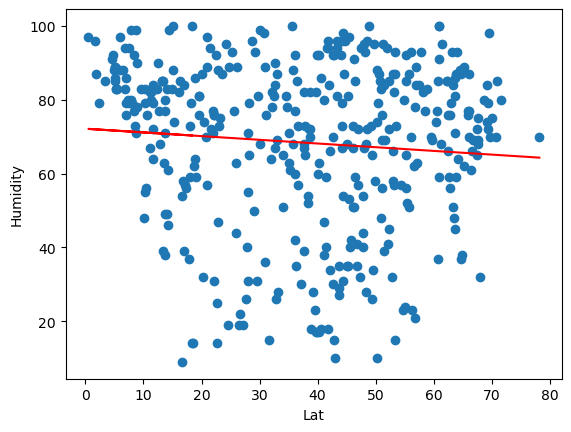

In [49]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: -0.02571016303118008


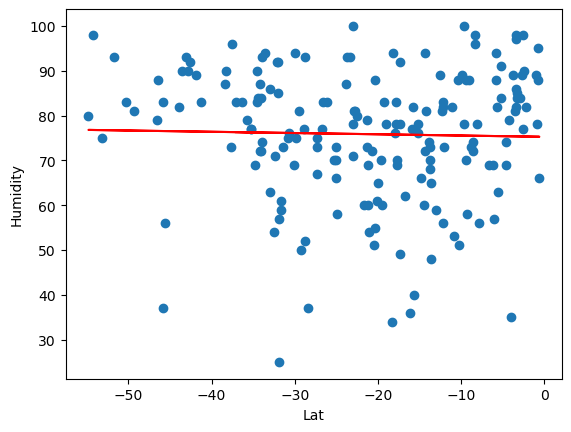

In [50]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** 

. There is weak negative correlation between temperature and latittude with a correlation of -0.08561792089641904 on Northen Hemisphere

. There is negligible correlation between temperature and latittude with a correlation of -0.02571016303118008 on Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.08661741198284412


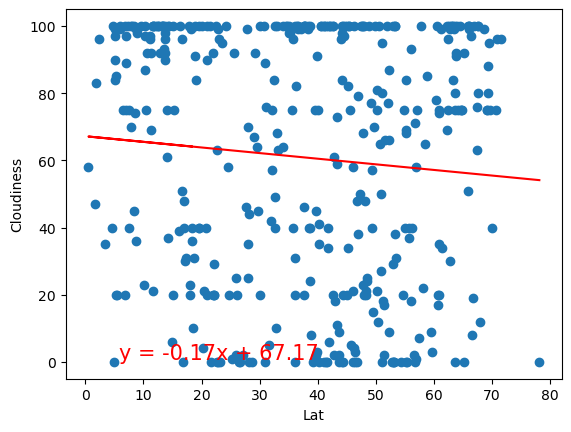

In [51]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: -0.08091358796244402


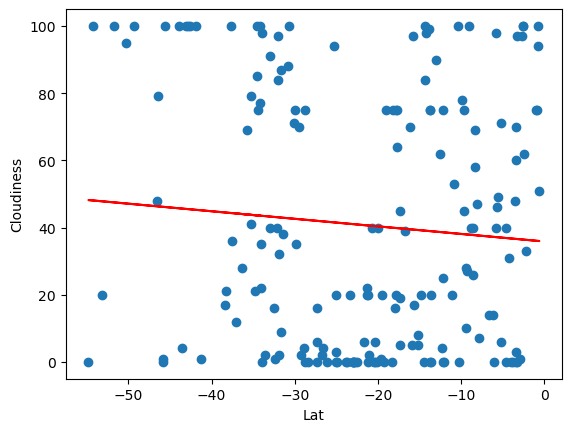

In [52]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:**

. There is weak negative correlation between temperature and latittude with a correlation of -0.08661741198284412 on Northen Hemisphere

. There is weak negative correlation between temperature and latittude with a correlation of -0.08091358796244402 on Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.11460134934187383


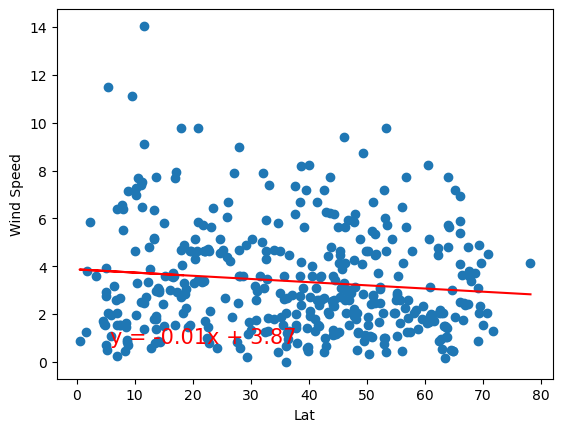

In [53]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: -0.08687150279107023


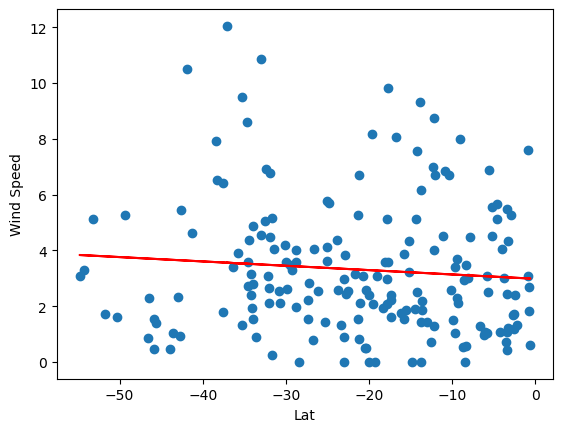

In [54]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:**

. There is weak negative correlation between temperature and latittude with a correlation of -0.11460134934187383 on Northen Hemisphere

. There is weak negative correlation between temperature and latittude with a correlation of -0.08687150279107023 on Southern Hemisphere